# EVALUASI & VALIDASI HASIL
### PADA TAHAP INI MODEL MESIN LEARNING YANG TELAH DIBUAT AKAN DI UJI DENGAN POLA DATA BARU

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, classification_report, confusion_matrix, ConfusionMatrixDisplay
import joblib
import warnings
warnings.filterwarnings("ignore")

In [2]:
#MEMBACA DATA BARU (DATA EVALUASI)
data=pd.read_csv('.\simpandata\data_evaluasi.csv')
data

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,24,71000,0,8.0,1,1,3500,11.49,0,0.05,0,2
1,22,46000,3,4.0,1,0,5000,7.88,0,0.11,0,2
2,23,70000,3,4.0,1,0,6000,7.49,0,0.09,0,2
3,21,30000,3,2.0,5,1,7000,10.99,0,0.23,0,3
4,21,57000,3,0.0,1,2,10800,13.22,0,0.19,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...
7581,37,108996,3,15.0,1,2,16000,13.11,0,0.15,1,13
7582,23,46551,0,7.0,5,1,15000,10.62,0,0.32,0,4
7583,21,80000,3,6.0,5,0,18000,7.90,0,0.23,0,2
7584,26,31836,3,1.0,1,2,6400,14.35,0,0.20,0,4


In [3]:
# Memisahkan fitur (X/input) dan target (y/output):
X_evaluasi = data.drop('loan_status', axis=1)
y_evaluasi = data['loan_status']

# 1. EVALUASI MODEL MESIN LEARNING-1 (TANPA FEATURE SCALLING)

In [4]:
# Membaca  model mesin learning tanpa feature scalling
model1 = joblib.load('.\model\mesin1_model.joblib')
model1

DecisionTreeClassifier(criterion='entropy')

In [5]:
y_pred_ev1 = model1.predict(X_evaluasi)
y_pred_ev1

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

Total jumlah data yang diuji: 7586
Jumlah hasil prediksi yang benar: 6737
Jumlah hasil prediksi yang salah: 849


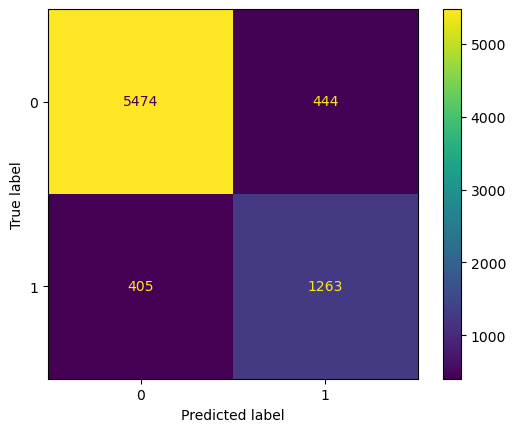

In [6]:
cm = confusion_matrix(y_evaluasi, y_pred_ev1)

cm_display = ConfusionMatrixDisplay(cm).plot()
# Menghitung jumlah prediksi yang benar dan salah  
jumlah_benar = np.sum(y_pred_ev1 == y_evaluasi)  # Jumlah prediksi yang benar  
jumlah_salah = np.sum(y_pred_ev1 != y_evaluasi)  # Jumlah prediksi yang salah  
total_data = len(y_evaluasi)                  # Total jumlah data yang diuji  

# Menampilkan hasil  
print(f'Total jumlah data yang diuji: {total_data}')  
print(f'Jumlah hasil prediksi yang benar: {jumlah_benar}')  
print(f'Jumlah hasil prediksi yang salah: {jumlah_salah}')


In [7]:
print("Accuracy:", accuracy_score(y_evaluasi, y_pred_ev1))
# menghitung precision, recall, dan f1 score
precision, recall, f1, _ = precision_recall_fscore_support(y_evaluasi, y_pred_ev1, average='weighted', zero_division=1)

# menampilkan classification report
print(classification_report(y_evaluasi, y_pred_ev1, zero_division=1))

Accuracy: 0.8880833113630372
              precision    recall  f1-score   support

           0       0.93      0.92      0.93      5918
           1       0.74      0.76      0.75      1668

    accuracy                           0.89      7586
   macro avg       0.84      0.84      0.84      7586
weighted avg       0.89      0.89      0.89      7586



# HASIL EVALUASI PADA MODEL 1 MENUNJUKAN BAHWA:
- EVALUASI & PENGUJIAN DENGAN MENGGUNAKAN POLA DATA BARU, NILAI AKURASI MENGALAMI PENINGKATAN **SEBESAR 0,0012% (NILAI RSQUARE AWAL SEBESAR 0.8847 MENJADI 0.8859)**, INI MENUNJUKAN BAHWA KINERJA MODEL INI TELAH STABIL (TIDAK MENGALAMI PENURUNAN NILAI AKURASI) DAN BEKERJA CUKUP BAIK

# 2. EVALUASI MODEL MESIN LEARNING-2 (DENGAN FEATURE SCALLING)

In [8]:
# Membaca  model mesin learning tanpa feature scalling
model2 = joblib.load('.\model\mesin3_model.joblib')
model2

DecisionTreeClassifier(max_depth=10, min_samples_leaf=2, min_samples_split=10)

In [9]:
# Memuat scaler yang telah dipasang (fitted) sebelumnya  
robust_scaler = joblib.load('./model/robust_scaler.joblib')  

# Membaca data evaluasi  
data_evaluasi = pd.read_csv('./simpandata/data_evaluasi.csv')  
X_evaluasi = data_evaluasi.drop('loan_status', axis=1)  
y_evaluasi = data_evaluasi['loan_status']  

# Menggunakan scaler untuk mentransformasi data evaluasi  
X_ev = robust_scaler.transform(X_evaluasi)  # Pastikan menggunakan transform, bukan fit_transform  


In [10]:
y_pred_ev2 = model2.predict(X_ev)
y_pred_ev2

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

Total jumlah data yang diuji: 7586
Jumlah hasil prediksi yang benar: 6938
Jumlah hasil prediksi yang salah: 648


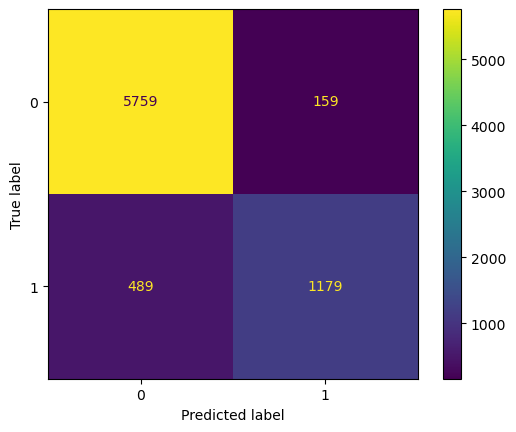

In [11]:
cm = confusion_matrix(y_evaluasi, y_pred_ev2)

cm_display = ConfusionMatrixDisplay(cm).plot()
# Menghitung jumlah prediksi yang benar dan salah  
jumlah_benar = np.sum(y_pred_ev2 == y_evaluasi)  # Jumlah prediksi yang benar  
jumlah_salah = np.sum(y_pred_ev2 != y_evaluasi)  # Jumlah prediksi yang salah  
total_data = len(y_evaluasi)                  # Total jumlah data yang diuji  

# Menampilkan hasil  
print(f'Total jumlah data yang diuji: {total_data}')  
print(f'Jumlah hasil prediksi yang benar: {jumlah_benar}')  
print(f'Jumlah hasil prediksi yang salah: {jumlah_salah}')


In [12]:
print("Accuracy:", accuracy_score(y_evaluasi, y_pred_ev2))
# menghitung precision, recall, dan f1 score
precision, recall, f1, _ = precision_recall_fscore_support(y_evaluasi, y_pred_ev2, average='weighted', zero_division=1)

# menampilkan classification report
print(classification_report(y_evaluasi, y_pred_ev2, zero_division=1))

Accuracy: 0.9145794885315054
              precision    recall  f1-score   support

           0       0.92      0.97      0.95      5918
           1       0.88      0.71      0.78      1668

    accuracy                           0.91      7586
   macro avg       0.90      0.84      0.87      7586
weighted avg       0.91      0.91      0.91      7586



# HASIL EVALUASI PADA MODEL 2 MENUNJUKAN BAHWA:
- ??